<a href="https://colab.research.google.com/github/shinchacoffee/2_circles_eparation_simple/blob/main/log_reg_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
feat_num = 1
epsilon = 1e-8
X = np.random.rand(100,feat_num).astype(np.float32)    #samples with 2 features
Y = np.random.randint(2, size=100).astype(np.float32)   #grand truth
X[:,0] = 0.1*X[:,0] + Y + 2*np.ones(100)
#X[:,1] = 0.1*X[:,1] + 1*np.ones(100)

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def loss(t,x):
  x = np.clip(x, epsilon, 1 - epsilon)
  return np.mean(-t * np.log(x) - (1 - t) * np.log(1 - x))

class Model:
  def __init__(self, feat_num) -> None:
    self.weights = np.ones(feat_num) #0.01*np.random.rand(feat_num)
    self.biases = -1 #np.random.rand(1)
    self.dweights = np.empty_like(self.weights)
    self.dbiases = np.empty_like(self.biases)
  
  def forward(self, x):
    #print(x*self.weights)
    #print(np.dot(x,self.weights))
    return sigmoid(np.dot(x, self.weights) + self.biases)

  def forfixw(self, x, w, b):
    return sigmoid(np.dot(x, w) + b)

  def backprop(self, x, t):
    z = np.dot(x, self.weights) + self.biases
    self.dweights = np.mean(((t-sigmoid(z)).T*x.T).T, axis=0)
    self.dbiases = np.mean(t-sigmoid(z))

class Optimizer:
  def __init__(self, model, lr, mom):
    self.lr = lr
    self.mom = mom
    self.model = model

  def step(self):
    self.model.weights = self.model.weights + self.lr * self.model.dweights
    #self.model.biases = self.model.biases + self.lr * self.model.dbiases

In [ ]:
model = Model(feat_num)

In [ ]:
lr = 0.01
mom = 0.01
optim = Optimizer(model, lr, mom)

for i in range(1000):
  p = model.forward(X)
  model.backprop(X,Y)
  optim.step()
  #print(loss(Y, p))
  if i < 10:
    print(np.mean(np.around(p)*Y+(np.around(p)-1)*(Y-1)), loss(Y, p), model.weights, model.biases, -model.biases/model.weights, model.dweights, model.dbiases)
  if i % 100 == 0:
    print(np.mean(np.around(p)*Y+(np.around(p)-1)*(Y-1)), loss(Y, p), model.weights, model.biases, -model.biases/model.weights, model.dweights, model.dbiases)

0.47 0.9582117413412667 [0.99208128] -0.5040313229498192 [0.50805446] [-0.79187175] -0.40313229498192676
0.47 0.9582117413412667 [0.99208128] -0.5040313229498192 [0.50805446] [-0.79187175] -0.40313229498192676
0.47 0.950344385640833 [0.98422201] -0.5080380369161357 [0.51618236] [-0.78592774] -0.40067139663164153
0.47 0.9425906901184922 [0.97642281] -0.5120199016175548 [0.52438339] [-0.77991937] -0.3981864701419127
0.47 0.9349510088128558 [0.96868433] -0.5159766830653811 [0.5326572] [-0.77384808] -0.3956781447826318
0.47 0.9274256417252954 [0.96100718] -0.5199081538327746 [0.5410034] [-0.76771536] -0.39314707673934746
0.47 0.9200148340612995 [0.95339195] -0.5238140933171839 [0.54942156] [-0.76152278] -0.39059394844092976
0.47 0.9127187755708625 [0.94583923] -0.5276942879953417 [0.55791119] [-0.75527199] -0.3880194678157823
0.47 0.9055375999910491 [0.93834958] -0.5315485316701222 [0.56647175] [-0.74896468] -0.3854243674780536
0.47 0.8984713845934893 [0.93092356] -0.5353766257085786 [0.57

In [ ]:
import matplotlib.pyplot as plt

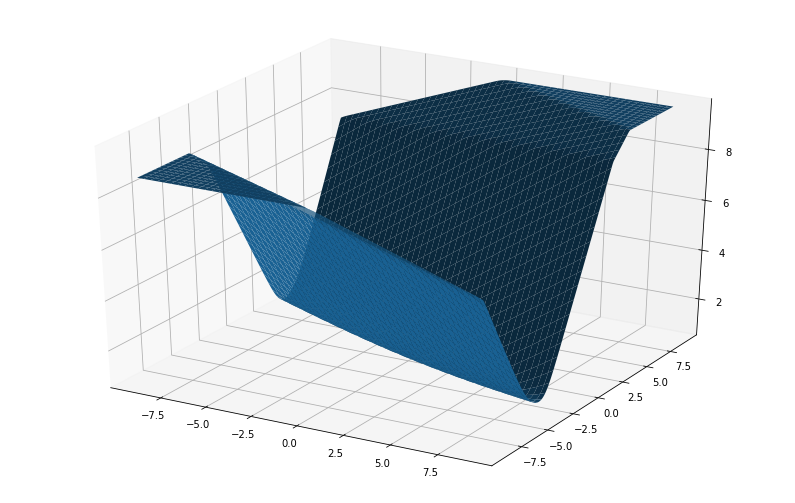

In [ ]:
pt_num = 200
ww1 = np.linspace(-9,9,pt_num)
ww2 = np.linspace(-9,9,pt_num)
zz = [[loss(Y, model.forfixw(X,wa,wb)) for wa in ww1] for wb in ww2]
ww1 =  np.outer(ww1, np.ones(pt_num))
ww2 = (np.outer(ww2, np.ones(pt_num))).T
zz = np.array(zz)
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.plot_surface(ww1, ww2, zz)
#plt.plot(w1, [loss(Y, model.forfixw(X,np.array([w2,w]),b)) for w in w1])
plt.show()

In [ ]:
import torch
import torchvision
import torch.nn
import torch.nn.functional
import torch.optim

In [ ]:
print(X.shape,Y.shape)
X = torch.from_numpy(X.reshape(100,1))
Y = torch.from_numpy(Y.reshape(100,1))
#make data with pytorch only !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# ZROB SEPARACJE OKREGOW CZY ZBIOROW KTORE NIE SA SEPAROWANE PROSTA : <


class MyDataSet(torch.utils.data.Dataset):
  def __init__(self, samples, targets):
    super().__init__()
    self.samples = samples
    self.targets = targets

  def __getitem__(self, idx):
    return self.samples[idx], self.targets[idx]

  def __len__(self):
    return len(self.samples)

my_data_set = MyDataSet(X, Y)

(100, 1) (100,)


In [ ]:
train_batch_size = 100
test_batch_size  = 100
train_loader = torch.utils.data.DataLoader(my_data_set,
                            batch_size=train_batch_size, shuffle = True)

test_loader  = torch.utils.data.DataLoader(my_data_set,
                            batch_size=test_batch_size,  shuffle = True)

In [ ]:
class My_net(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.line = torch.nn.Linear(1,1)

  def forward(self, signal):
    signal = torch.nn.functional.sigmoid(self.line(signal))
    return signal

In [ ]:
train_losses = []
train_counter = []
def train(network, optimizer, epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = torch.nn.functional.binary_cross_entropy(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 250 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))

test_losses = []
def test(network):
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += torch.nn.functional.binary_cross_entropy(output, target, size_average=False).item()
      correct += torch.sum(torch.round(output)*target+(torch.round(output)-1)*(target-1))
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print(correct, len(test_loader.dataset), "\n", output.T, "\n", torch.round(output).T, "\n", target.T)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [ ]:
network = My_net()
learnin_rate = 0.01
my_momentum = 0
my_weight_decay = 0
optimizer = torch.optim.SGD(network.parameters(), lr=learnin_rate, momentum=my_momentum, weight_decay=my_weight_decay)

In [ ]:
n_epochs=100
for epoch in range(1, n_epochs+1):
  train(network, optimizer, epoch)

test(network)

In [ ]:
import torch
import torchvision
import torch.nn
import torch.nn.functional
import torch.optim
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

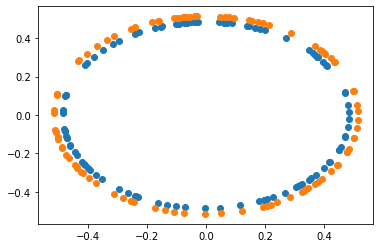

In [ ]:
angle = torch.rand(100)
in_circ = 0.485*torch.concat((torch.cos(2*torch.pi*angle).reshape(-1,1), torch.sin(2*torch.pi*angle).reshape(-1,1)), axis=1)
ou_circ = 0.515*torch.concat((torch.cos(2*torch.pi*angle).reshape(-1,1), torch.sin(2*torch.pi*angle).reshape(-1,1)), axis=1)
sample = torch.concat((in_circ, ou_circ))
target = torch.concat((torch.zeros(100), torch.ones(100))).reshape(-1,1)
plt.scatter(in_circ[:,0], in_circ[:,1])
plt.scatter(ou_circ[:,0], ou_circ[:,1])
plt.show()

In [ ]:
class MyDataSet(torch.utils.data.Dataset):
  def __init__(self, samples, targets):
    super().__init__()
    self.samples = samples
    self.targets = targets

  def __getitem__(self, idx):
    return self.samples[idx], self.targets[idx]

  def __len__(self):
    return len(self.samples)

my_data_set = MyDataSet(sample, target)

In [ ]:
train_batch_size = 16
test_batch_size  = 200
train_loader = torch.utils.data.DataLoader(my_data_set,
                            batch_size=train_batch_size, shuffle = True)

test_loader  = torch.utils.data.DataLoader(my_data_set,
                            batch_size=test_batch_size,  shuffle = False)

In [ ]:
class My_net(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.line1 = torch.nn.Linear(2,3)
    self.line2 = torch.nn.Linear(3,1)

  def forward(self, x):
    signal = torch.nn.functional.sigmoid(self.line1(x))
    output = torch.nn.functional.sigmoid(self.line2(signal))
    return signal, output

In [ ]:
train_losses = []
train_counter = []
def train(network, optimizer, epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    smiec, output = network(data)
    target = target.reshape(-1,1)
    loss = torch.nn.functional.binary_cross_entropy(output, target)
    loss.backward()
    optimizer.step()

test_losses = []
def test(network):
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      smiec, output = network(data)
      target = target.reshape(-1,1)
      test_loss += torch.nn.functional.binary_cross_entropy(output, target, size_average=False).item()
      correct += torch.sum(torch.round(output)*target+(torch.round(output)-1)*(target-1))
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  #print(correct, len(test_loader.dataset), "\n", output.T, "\n", torch.round(output).T, "\n", target.T)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [ ]:
network = My_net()
#network.line1.weight.data = torch.tensor([[0,-1],[1,1],[-1,1]])
#network.line1.bias.data = torch.tensor([0.2,-0.28,-0.28])
print(network.line1.bias.shape)
learnin_rate = 0.005
my_momentum = 0
my_weight_decay = 0
optimizer = torch.optim.SGD(network.parameters(), lr=learnin_rate, momentum=my_momentum, weight_decay=my_weight_decay)
#network.line1.weight.data = torch.tensor([[0,-1],[1,1],[-1,1]])
#network.line1.bias.data = torch.tensor([0.2,-0.28,-0.28])
network.line1.weight.data = torch.tensor(np.array([[0,-1],[1,1],[-1,1]]).astype(np.float32))
network.line1.bias.data = torch.tensor(np.array([0.2,-0.2,-0.2]).astype(np.float32))

torch.Size([3])


In [ ]:
learnin_rate = 0.0051
my_momentum = 0
my_weight_decay = 0
optimizer = torch.optim.SGD(network.parameters(), lr=learnin_rate, momentum=my_momentum, weight_decay=my_weight_decay)

In [ ]:
n_epochs=10000
for epoch in range(1, n_epochs+1):
  network.line1.weight.data[0,1]=0
  train(network, optimizer, epoch)
  

#network.line1.weight.data = torch.tensor(np.array([[0,-1],[1,1],[-1,1]]).astype(np.float32))
#network.line1.bias.data = torch.tensor(np.array([0.2,-0.2,-0.2]).astype(np.float32))

test(network)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")



Test set: Avg. loss: 0.4128, Accuracy: 192.0/200 (96%)



/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [ ]:
test(network)
print(network.line1.weight.data)
print(network.line1.bias.data)


Test set: Avg. loss: 0.4238, Accuracy: 197.0/200 (98%)

tensor([[-1.0251e+01,  6.9056e-04],
        [ 6.1585e+00,  8.3356e+00],
        [-5.1991e+00,  9.5131e+00]])
tensor([-2.2635, -2.6352,  3.4384])


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [ ]:
test(network)
print(network.line1.weight.data)
print(network.line1.bias.data)
print(network.line2.weight.data)
print(network.line2.bias.data)


Test set: Avg. loss: 0.4128, Accuracy: 192.0/200 (96%)

tensor([[-9.4946e+00,  9.3315e-04],
        [ 5.9045e+00,  7.9582e+00],
        [-5.3508e+00,  8.8564e+00]])
tensor([-1.9106, -2.7559,  3.3311])
tensor([[ 33.8804,  35.2855, -36.3147]])
tensor([4.4894])


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


torch.Size([100, 3]) torch.Size([100, 3])


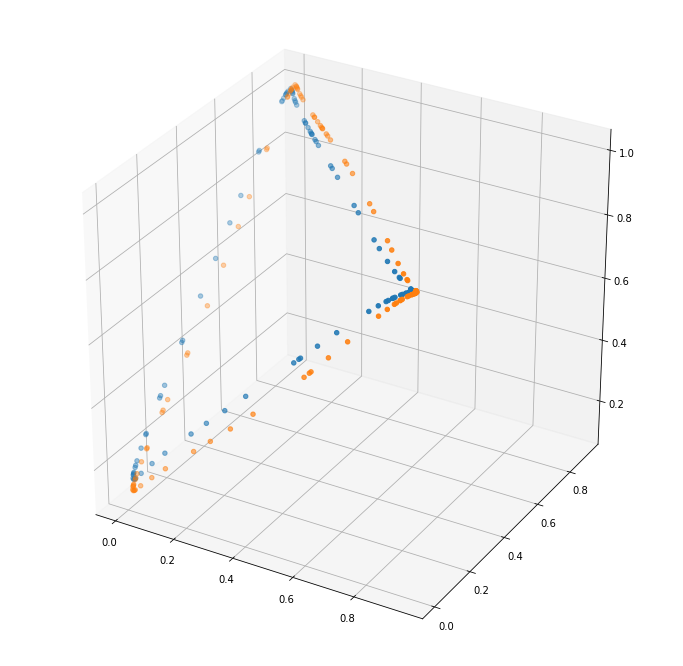

In [ ]:


test_losses = []
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
def test_print(network):
  network.eval()
  with torch.no_grad():
    for data, target in test_loader:
      smiec, output = network(data)
      in_smiec = smiec[:100]
      ou_smiec = smiec[100:]
      
      print(in_smiec.shape, ou_smiec.shape)
    ax.scatter(in_smiec[:,0], in_smiec[:,1], in_smiec[:,2])
    ax.scatter(ou_smiec[:,0], ou_smiec[:,1], ou_smiec[:,2])
    plt.show()

test_print(network)


#from mpl_toolkits.mplot3d import Axes3D
#   ax = Axes3D(fig)
#   ax.scatter(xx,yy,zz, marker='o', s=20, c="goldenrod", alpha=0.6)
#    for ii in xrange(0,360,1):
#        ax.view_init(elev=10., azim=ii)
#        savefig("movie%d.png" % ii)